### Important Notes to follow for doing the assignmnets

1. Use Markdown to create your assignmnets. Use <a href="https://markdownmonster.west-wind.com/" target="_blank">Markdown_Monster</a> or <a href="https://typora.io/" target="_blank">Typora</a> to decorate your documents. 
2. There should be pictures attached to the needed documnets can be internet souce or self made.
3. Mention all the important formula and equations needed as per the topic
4. Upload all the assignments chapterwise/sectionwise.
5. Submit all your assignmnets before deadlines.
6. Write the answers below the specific questions.

**Question 1.** Create a python program to find it out the Named entity recognition(NER) from the following sentence using spacy and visualizing those parts in sentence.

"I saw a kitten eating chicken in the kitchen"

**Question 2.** Find out the similar words from following list using spacy library.

["ship car truck motor-bike jeep hagskdshd"]

**Question 3.** Visualize sentences including parts of speech(pos) tagging and linguistic annotation in it by using spacy library.

**Question 4.** What is Word vector? And, how could you convert words into vector?

**Question 5.** Define Vocab, hashes and lexemes in your own word.

In [ ]:
!python -m spacy download en_core_web_lg

# Question 1. 
Create a python program to find it out the Named entity recognition(NER) from the following sentence using spacy and visualizing those parts in sentence.

In [13]:
import spacy 
from spacy import displacy

In [57]:
sent = "I saw a kitten eating chicken in the kitchen"

In [61]:
#loading the en_core module 

nlp = spacy.load('en_core_web_md')

nlp

In [62]:
nlp.vocab.length

1340241

In [63]:
docs = nlp(sent)

for tokens in docs:
    
    print(tokens,tokens.tag_)

I PRP
saw VBD
a DT
kitten JJ
eating VBG
chicken NN
in IN
the DT
kitchen NN


In [89]:
displacy.render(docs)

In [79]:
# displaying entity types 
docs.ents

()

In [72]:
from spacy.pipeline import EntityRecognizer 
ner = EntityRecognizer(nlp.vocab)
ner

In [75]:
nlp.pipeline.append(ner)

In [78]:
optimizer = ner.begin_training(pipeline = nlp.pipeline)


TypeError: begin_training() takes at least 1 positional argument (0 given)

# Questions 2
Find out the similar words from following list using spacy library.

["ship car truck motor-bike jeep hagskdshd"]

In [21]:
## tokenizing 

In [23]:
for i in nlp.vocab:
    
    if 'motor-bike'  == i.text:
        print('motor-bike found')
        break
    
    if 'motorbike'  == i.text: 
        print('motorbike found')
        break 
        

motorbike found


### Since motorbike is present and not motor-bike hence will convert motor-bike to motorbike

In [24]:
import re 
sent = "ship car truck motor-bike jeep hagskdshd"


sent = sent.replace("-",'')

print(sent)

#checking if all words are present in the vocab

tokens = nlp(sent) 
  
for token in tokens: 

    print(token.text, token.is_oov) 


ship car truck motorbike jeep hagskdshd
ship False
car False
truck False
motorbike False
jeep False
hagskdshd True


## looks like all words except 'hagskdshd ' which looks like some random word is not present in vocab

In [30]:
#checking the similarity of each token with every other token
import warnings 

warnings.filterwarnings("ignore")


tokens = nlp(sent)

for token1 in tokens:
    
    for token2 in tokens:
        
        if token1 != token2:
            print(f'similarity betwn of {token1}  and  {token2} = {token1.similarity(token2)}')

similarity betwn of ship  and  car = 0.28155869245529175
similarity betwn of ship  and  truck = 0.3536790609359741
similarity betwn of ship  and  motorbike = 0.2287973165512085
similarity betwn of ship  and  jeep = 0.2103627324104309
similarity betwn of ship  and  hagskdshd = 0.0
similarity betwn of car  and  ship = 0.28155869245529175
similarity betwn of car  and  truck = 0.7113439440727234
similarity betwn of car  and  motorbike = 0.5879228711128235
similarity betwn of car  and  jeep = 0.5652785897254944
similarity betwn of car  and  hagskdshd = 0.0
similarity betwn of truck  and  ship = 0.3536790609359741
similarity betwn of truck  and  car = 0.7113439440727234
similarity betwn of truck  and  motorbike = 0.5753129124641418
similarity betwn of truck  and  jeep = 0.6284900903701782
similarity betwn of truck  and  hagskdshd = 0.0
similarity betwn of motorbike  and  ship = 0.2287973165512085
similarity betwn of motorbike  and  car = 0.5879228711128235
similarity betwn of motorbike  and 

## Trying something new

## A better Way to represent this is to crease a Similarity Matrix  like correlation matrix 

In [31]:
len(tokens)

6

In [45]:
import numpy as np 


sim_matrix = np.zeros((len(tokens),len(tokens)))

print(sim_matrix.shape)


for i,token1 in enumerate(tokens):
    
    for j,token2 in enumerate(tokens):
            
        sim_matrix[i,j] = token1.similarity(token2)        


sim_matrix

(6, 6)


array([[1.        , 0.28155869, 0.35367906, 0.22879732, 0.21036273,
        0.        ],
       [0.28155869, 1.        , 0.71134394, 0.58792287, 0.56527859,
        0.        ],
       [0.35367906, 0.71134394, 1.        , 0.57531291, 0.62849009,
        0.        ],
       [0.22879732, 0.58792287, 0.57531291, 1.        , 0.50640589,
        0.        ],
       [0.21036273, 0.56527859, 0.62849009, 0.50640589, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

# Creating A heatmap 

In [43]:
sent.split()

['ship', 'car', 'truck', 'motorbike', 'jeep', 'hagskdshd']

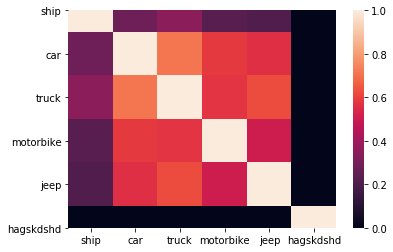

In [48]:
import seaborn as sns 

sns.heatmap(sim_matrix,xticklabels = sent.split(),yticklabels = sent.split())

#### Observations: as we can see the last word is not related with any other word. looks like out method is working .. now we just need a to decide a threshold level looking cbar the value should be above 0.5

In [49]:
# finding simialr words 
words = set()

for token1 in tokens:
    
    for token2 in tokens:
        
        if token1 != token2:
                
            if token1.similarity(token2) > 0.5:    
            
                if token1 not in words and token2 not in words:


                    words.add(token1)
                    words.add(token2)

                



words

{car, truck, motorbike, jeep}

In [50]:
# K all this words are related to one another all are vehicles on the road.

#  3. Visualize sentences including parts of speech(pos) tagging and linguistic annotation in it by using spacy library.

In [93]:
#Visualizing part of speech tagging 
data =  '''European authorities fined Google a record $5.1 billion on Wednesday for  abusing its power in the mobile phone market and ordered the company to alter its practices. Reported by James Potter  '''
print(data)


European authorities fined Google a record $5.1 billion on Wednesday for  abusing its power in the mobile phone market and ordered the company to alter its practices. Reported by James Potter  


In [99]:
doc = nlp(data)

print("Text\t\tLemma\t\tPos\t\tTag")

for token in doc[0:10]:
    print(token.text,"\t", token.lemma_,"\t",token.pos_,"\t", token.tag_)

Text		Lemma		Pos		Tag
European 	 european 	 ADJ 	 JJ
authorities 	 authority 	 NOUN 	 NNS
fined 	 fine 	 VERB 	 VBD
Google 	 Google 	 PROPN 	 NNP
a 	 a 	 DET 	 DT
record 	 record 	 NOUN 	 NN
$ 	 $ 	 SYM 	 $
5.1 	 5.1 	 NUM 	 CD
billion 	 billion 	 NUM 	 CD
on 	 on 	 ADP 	 IN


In [101]:
#printing entities 

for ent in doc.ents:
    print(ent)

European
Google
$5.1 billion
Wednesday
James Potter  


In [102]:
displacy.render(doc,style = 'ent')

In [103]:
displacy.render(doc)

# Question 4
###  What is Word vector? And, how could you convert words into vector?

Ans: A word vector is a numerical representation of the word, since a ml or dl model cannot accept a word it need to be encoded. This can be done using statistical methods like `count,tfidf vectorizer or one - hot encoding` but they fail to convey any positional information about the word. Another way to encode words to vectors is using algos. like ` word2vec , glove ` which take the position of the word into account. *The intution  here is that similar words will appear closer to each other (or in the same neighbourhood). This is how we can find similarity in question 2.*

The problem with this approach is that they dont take context into account eg. `"yesterday i will visite my bank" , "i am near the river bank"` . in this example bank means two different things but word2vec or glove will thing its the same word. Contextual embeddings like using transformers are used to overcome this problem. 

# Question 5
### Define Vocab, hashes and lexemes in your own word.

vocab : contains all the unique words from your dataset. 

hashes : In this we have a hash function, which is a mathem mathematical function,which converts a input a unique output.We often use hashing to increase the read/write speed and also space efficient.  It works by applying a hash function to the features and using their hash values as indices directly, rather than looking the indices up in an associative array. Other places hashfunction used are : 
1. saving passwords: the password is convert into a hashed value or message digest 
   

lexemes : An abstract representation of a word (and all its forms), with a part-of-speech and a set of related word senses.

